In [1]:
import copernicusmarine as cm 
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy

c:\ProgramData\miniconda3\envs\tfg\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Datos Mean Dynamic Topography Mediterráneo

(371, 1013)


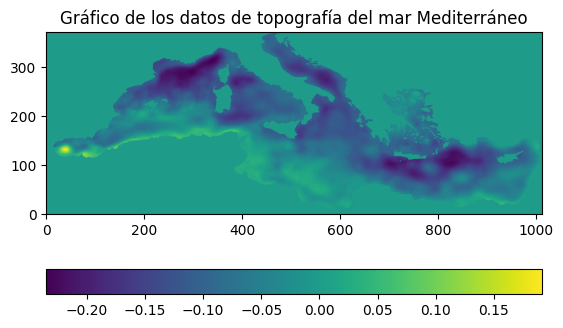

In [2]:
data = np.load('data\mediterranean\static\sea_topography.npy')

print(data.shape)

plt.imshow(data, cmap='viridis', origin='lower')
plt.colorbar(orientation='horizontal')
plt.title('Gráfico de los datos de topografía del mar Mediterráneo')
plt.show()

### Adapatando MDT gloo al Mediterráneo

#### Convertir a array

In [3]:
#https://data.marine.copernicus.eu/product/SEALEVEL_EUR_PHY_MDT_L4_STATIC_008_070/files?subdataset=cmems_obs-sl_eur_phy-mdt_my_l4-0.0625deg_P20Y_202411--ext--mdt
mdt_europe = xr.open_dataset(r"data\mdt_cmems_2024_europe.nc")

array_mdt_europe = mdt_europe["mdt"].values.squeeze()

array_mdt_europe = np.nan_to_num(array_mdt_europe, nan=0)

#### Pasar a sistema de latitud longitud base

In [4]:
latitudes = mdt_europe["latitude"].values
longitudes = mdt_europe["longitude"].values

min_latitude = 30.19
max_latitude = 45.98
min_longitude = -6
max_longitude = 36.29

central_lat = (min_latitude + max_latitude) / 2
central_lon = (min_longitude + max_longitude) / 2

lat_idx = (np.abs(latitudes - central_lat)).argmin()
lon_idx = (np.abs(longitudes - central_lon)).argmin()

print(f"Índice de latitud más cercano a {central_lat}: {lat_idx}, latitud: {latitudes[lat_idx]}")
print(f"Índice de longitud más cercano a {central_lon}: {lon_idx}, longitud: {longitudes[lon_idx]}")

Índice de latitud más cercano a 38.085: 305, latitud: 38.09375
Índice de longitud más cercano a 15.145: 754, longitud: 15.15625


#### Recortando modelo más grande

In [5]:
array_mdt_europe_closest = array_mdt_europe[lat_idx-185:lat_idx+185, lon_idx-506:lon_idx+506]

data = data[1:, 1:]

#### Interpolación de coordenadas

In [6]:
num_lat, num_lon = data.shape
latitudes_data = np.linspace(min_latitude, max_latitude, num_lat)
longitudes_data = np.linspace(min_longitude, max_longitude, num_lon)

mdt_europe_adjusted = xr.DataArray(
    array_mdt_europe_closest,
    coords={"latitude": latitudes[lat_idx-185:lat_idx+185], "longitude": longitudes[lon_idx-506:lon_idx+506]},
    dims=["latitude", "longitude"]
)

mdt_europe_adjusted = mdt_europe_adjusted.interp(latitude=latitudes_data, longitude=longitudes_data)

mdt_europe_adjusted_values = mdt_europe_adjusted.values

#### Resultado

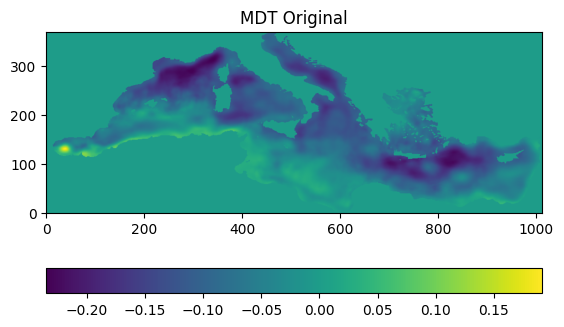

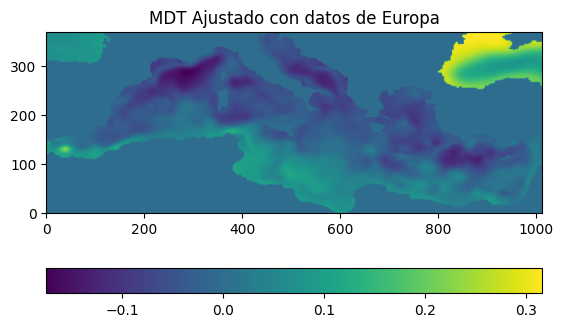

In [7]:
plt.figure()
plt.imshow(data, cmap='viridis', origin='lower')
plt.colorbar(orientation='horizontal')
plt.title('MDT Original')

plt.figure()
plt.imshow(mdt_europe_adjusted_values, cmap='viridis', origin='lower')
plt.colorbar(orientation='horizontal')
plt.title('MDT Ajustado con datos de Europa')

plt.show()

### Controlando Mar Negro:

In [8]:
min_latitude_black_sea = 40.0
max_latitude_black_sea = 46
min_longitude_black_sea = 27.0
max_longitude_black_sea = 41.0


lat_min_idx = (np.abs(latitudes_data - min_latitude_black_sea)).argmin()
lat_max_idx = (np.abs(latitudes_data - max_latitude_black_sea)).argmin()
lon_min_idx = (np.abs(longitudes_data - min_longitude_black_sea)).argmin()
lon_max_idx = (np.abs(longitudes_data - max_longitude_black_sea)).argmin()


lat_min_idx, lat_max_idx = sorted([lat_min_idx, lat_max_idx])
lon_min_idx, lon_max_idx = sorted([lon_min_idx, lon_max_idx])

mdt_europe_adjusted_values[lat_min_idx:lat_max_idx+1, lon_min_idx:lon_max_idx+1] = 0

print(np.unique(mdt_europe_adjusted_values[lat_min_idx:lat_max_idx+1, lon_min_idx:lon_max_idx+1]))

[0.]


#### Resultado

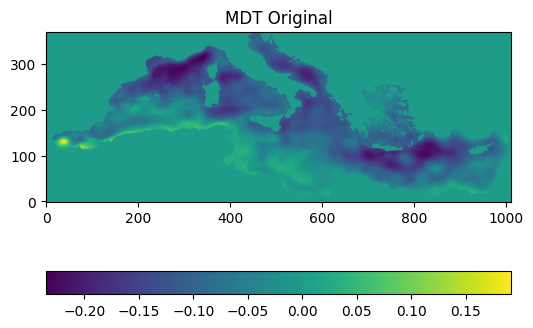

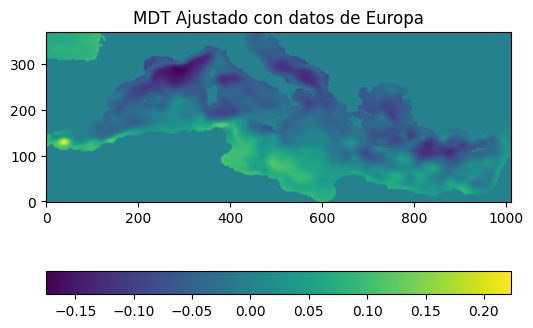

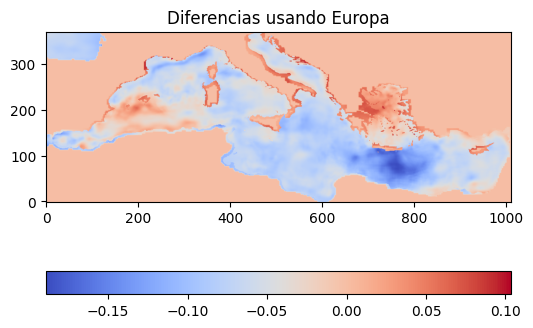

In [9]:
differences = data - mdt_europe_adjusted_values

plt.figure(figsize=(6, 6))
plt.imshow(data, cmap='viridis', origin='lower')
plt.colorbar(orientation='horizontal')
plt.title('MDT Original')
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(mdt_europe_adjusted_values, cmap='viridis', origin='lower')
plt.colorbar(orientation='horizontal')
plt.title('MDT Ajustado con datos de Europa')
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(differences, cmap='coolwarm', origin='lower')
plt.colorbar(orientation='horizontal')
plt.title('Diferencias usando Europa')
plt.show()

### Usando datos específicos del Mediterráneo

In [10]:
#https://data.marine.copernicus.eu/product/SEALEVEL_MED_PHY_MDT_L4_STATIC_008_066/files?subdataset=cmems_obs-sl_med_phy-mdt_my_l4-0.0417deg_P20Y_202105--ext--mdt
mdt_med = xr.open_dataset(r"data\mdt_cmems_2020_med.nc")

array_mdt_med = mdt_med["mdt"].values.squeeze()

array_mdt_med = np.nan_to_num(array_mdt_med, nan=0)

#### Pasar a sistema de latitud longitud base

In [11]:
latitudes = mdt_med["latitude"].values
longitudes = mdt_med["longitude"].values

min_latitude = 30.19
max_latitude = 45.98
min_longitude = -6
max_longitude = 36.29

central_lat = (min_latitude + max_latitude) / 2
central_lon = (min_longitude + max_longitude) / 2

lat_idx = (np.abs(latitudes - central_lat)).argmin()
lon_idx = (np.abs(longitudes - central_lon)).argmin()

print(f"Índice de latitud más cercano a {central_lat}: {lat_idx}, latitud: {latitudes[lat_idx]}")
print(f"Índice de longitud más cercano a {central_lon}: {lon_idx}, longitud: {longitudes[lon_idx]}")

Índice de latitud más cercano a 38.085: 218, latitud: 38.10417175292969
Índice de longitud más cercano a 15.145: 509, longitud: 15.145830154418945


#### Recortando modelo más grande

In [12]:
array_mdt_med_closest = array_mdt_med[lat_idx-185:lat_idx+185, lon_idx-506:lon_idx+506]

data = data[1:, 1:]

#### Interpolación de coordenadas

In [13]:
num_lat, num_lon = data.shape
latitudes_data = np.linspace(min_latitude, max_latitude, num_lat)
longitudes_data = np.linspace(min_longitude, max_longitude, num_lon)

mdt_med_adjusted = xr.DataArray(
    array_mdt_med_closest,
    coords={"latitude": latitudes[lat_idx-185:lat_idx+185], "longitude": longitudes[lon_idx-506:lon_idx+506]},
    dims=["latitude", "longitude"]
)

mdt_med_adjusted = mdt_med_adjusted.interp(latitude=latitudes_data, longitude=longitudes_data)

mdt_med_adjusted_values = mdt_med_adjusted.values

#### Resultado

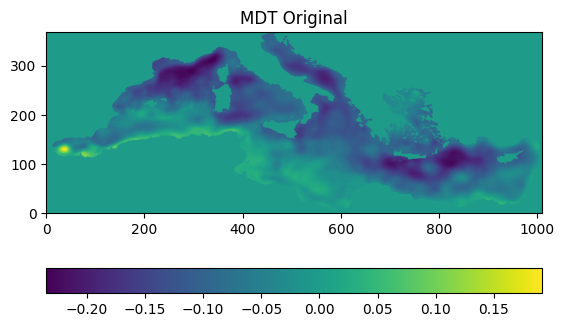

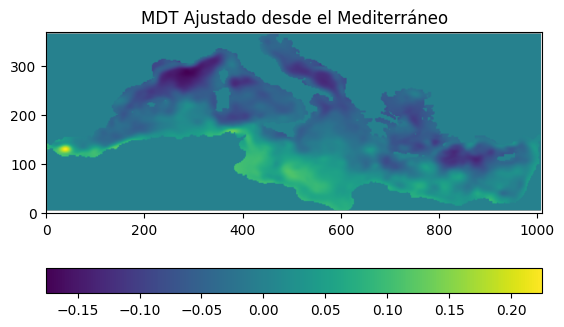

In [14]:
plt.figure()
plt.imshow(data, cmap='viridis', origin='lower')
plt.colorbar(orientation='horizontal')
plt.title('MDT Original')

plt.figure()
plt.imshow(mdt_med_adjusted_values, cmap='viridis', origin='lower')
plt.colorbar(orientation='horizontal')
plt.title('MDT Ajustado desde el Mediterráneo')

plt.show()

### Controlando Mar Negro:

In [15]:
min_latitude_black_sea = 40.0
max_latitude_black_sea = 46
min_longitude_black_sea = 27.0
max_longitude_black_sea = 41.0


lat_min_idx = (np.abs(latitudes_data - min_latitude_black_sea)).argmin()
lat_max_idx = (np.abs(latitudes_data - max_latitude_black_sea)).argmin()
lon_min_idx = (np.abs(longitudes_data - min_longitude_black_sea)).argmin()
lon_max_idx = (np.abs(longitudes_data - max_longitude_black_sea)).argmin()


lat_min_idx, lat_max_idx = sorted([lat_min_idx, lat_max_idx])
lon_min_idx, lon_max_idx = sorted([lon_min_idx, lon_max_idx])

mdt_med_adjusted_values[lat_min_idx:lat_max_idx+1, lon_min_idx:lon_max_idx+1] = 0

# Verificar si efectivamente la región quedó en 0
print(np.unique(mdt_med_adjusted_values[lat_min_idx:lat_max_idx+1, lon_min_idx:lon_max_idx+1]))


[0.]


#### Resultado

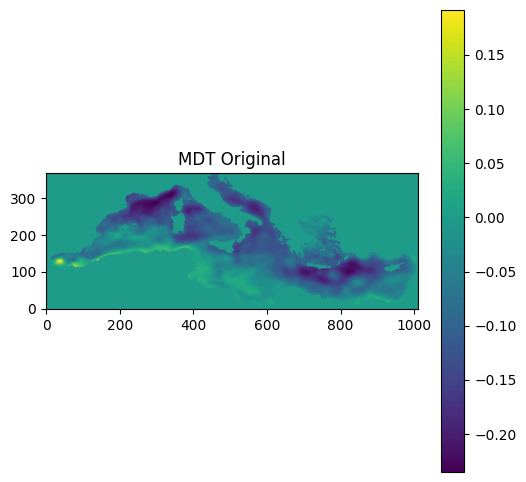

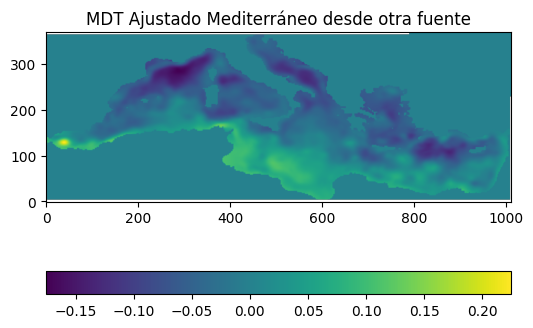

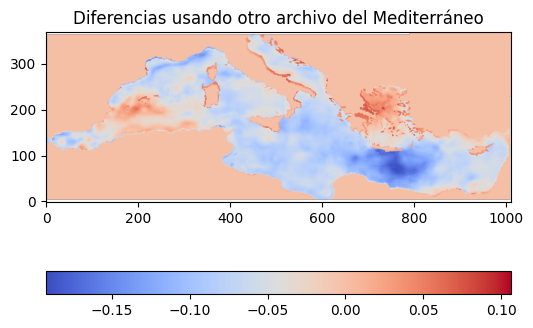

In [16]:
differences = data - mdt_med_adjusted_values

plt.figure(figsize=(6, 6))
plt.imshow(data, cmap='viridis', origin='lower')
plt.colorbar()
plt.title('MDT Original')
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(mdt_med_adjusted_values, cmap='viridis', origin='lower')
plt.colorbar(orientation='horizontal')
plt.title('MDT Ajustado Mediterráneo desde otra fuente')
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(differences, cmap='coolwarm', origin='lower')
plt.colorbar(orientation='horizontal')
plt.title('Diferencias usando otro archivo del Mediterráneo')
plt.show()

### Usando datos Globales

In [17]:
#https://data.marine.copernicus.eu/product/SEALEVEL_MED_PHY_MDT_L4_STATIC_008_066/files?subdataset=cmems_obs-sl_med_phy-mdt_my_l4-0.0417deg_P20Y_202105--ext--mdt
mdt_glo = xr.open_dataset(r"data\GLO-MFC_001_030_mdt.nc")

array_mdt_glo = mdt_glo["mdt"].values.squeeze()

array_mdt_glo = np.nan_to_num(array_mdt_glo, nan=0)

#### Pasar a sistema de latitud longitud base

In [18]:


latitudes = mdt_glo["latitude"].values
longitudes = mdt_glo["longitude"].values

min_latitude = 30.19
max_latitude = 45.98
min_longitude = -6
max_longitude = 36.29

central_lat = (min_latitude + max_latitude) / 2
central_lon = (min_longitude + max_longitude) / 2

lat_idx = (np.abs(latitudes - central_lat)).argmin()
lon_idx = (np.abs(longitudes - central_lon)).argmin()

print(f"Índice de latitud más cercano a {central_lat}: {lat_idx}, latitud: {latitudes[lat_idx]}")
print(f"Índice de longitud más cercano a {central_lon}: {lon_idx}, longitud: {longitudes[lon_idx]}")

Índice de latitud más cercano a 38.085: 1417, latitud: 38.08333206176758
Índice de longitud más cercano a 15.145: 2342, longitud: 15.166666984558105


#### Recortando modelo más grande

In [19]:
array_mdt_glo_closest = array_mdt_glo[lat_idx-185:lat_idx+185, lon_idx-506:lon_idx+506]

data = data[1:, 1:]

#### Interpolación de coordenadas

In [20]:
num_lat, num_lon = data.shape
latitudes_data = np.linspace(min_latitude, max_latitude, num_lat)
longitudes_data = np.linspace(min_longitude, max_longitude, num_lon)

mdt_glo_adjusted = xr.DataArray(
    array_mdt_glo_closest,
    coords={"latitude": latitudes[lat_idx-185:lat_idx+185], "longitude": longitudes[lon_idx-506:lon_idx+506]},
    dims=["latitude", "longitude"]
)

mdt_glo_adjusted = mdt_glo_adjusted.interp(latitude=latitudes_data, longitude=longitudes_data)

mdt_glo_adjusted_values = mdt_glo_adjusted.values

#### Resultado

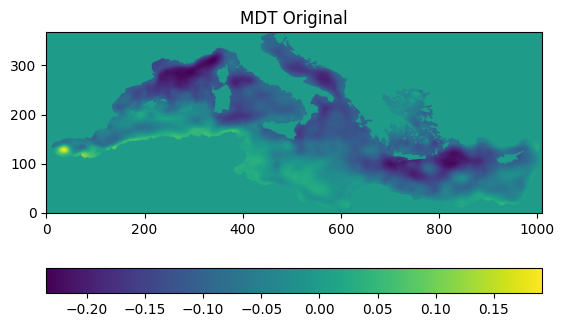

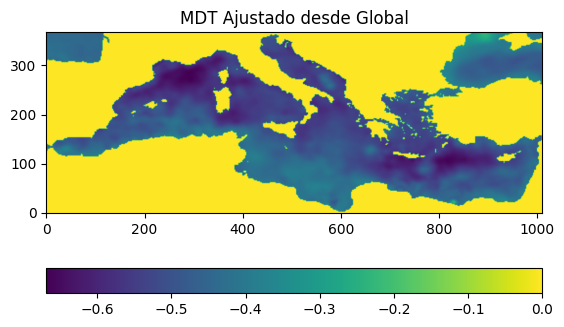

In [21]:
plt.figure()
plt.imshow(data, cmap='viridis', origin='lower')
plt.colorbar(orientation='horizontal')
plt.title('MDT Original')

plt.figure()
plt.imshow(mdt_glo_adjusted_values, cmap='viridis', origin='lower')
plt.colorbar(orientation='horizontal')
plt.title('MDT Ajustado desde Global')

plt.show()

### Controlando Mar Negro:

In [22]:
min_latitude_black_sea = 40.0
max_latitude_black_sea = 46
min_longitude_black_sea = 27.0
max_longitude_black_sea = 41.0

lat_min_idx = (np.abs(latitudes_data - min_latitude_black_sea)).argmin()
lat_max_idx = (np.abs(latitudes_data - max_latitude_black_sea)).argmin()
lon_min_idx = (np.abs(longitudes_data - min_longitude_black_sea)).argmin()
lon_max_idx = (np.abs(longitudes_data - max_longitude_black_sea)).argmin()

lat_min_idx, lat_max_idx = sorted([lat_min_idx, lat_max_idx])
lon_min_idx, lon_max_idx = sorted([lon_min_idx, lon_max_idx])

mdt_glo_adjusted_values[lat_min_idx:lat_max_idx+1, lon_min_idx:lon_max_idx+1] = 0

print(np.unique(mdt_glo_adjusted_values[lat_min_idx:lat_max_idx+1, lon_min_idx:lon_max_idx+1]))

[0.]


#### Resultado

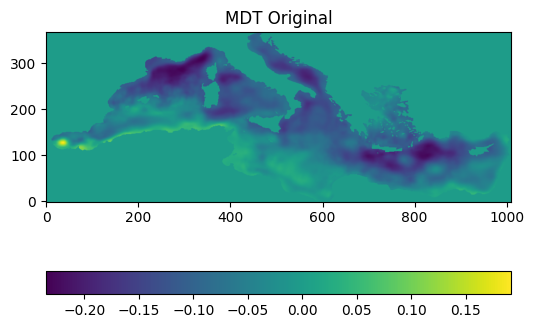

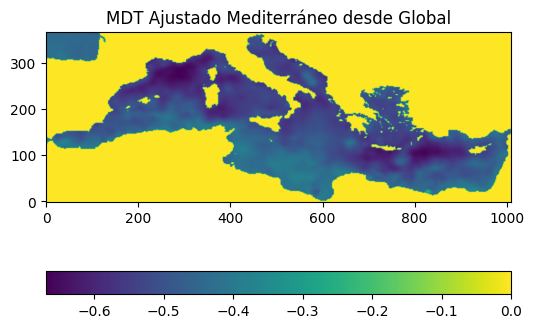

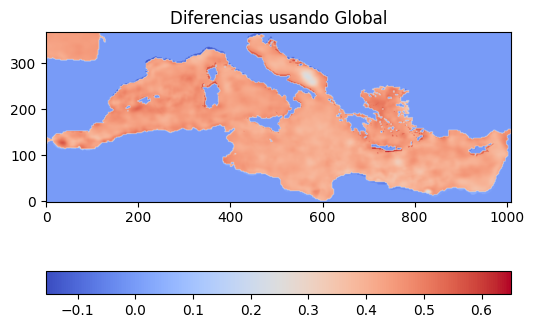

In [23]:
differences = data - mdt_glo_adjusted_values

plt.figure(figsize=(6, 6))
plt.imshow(data, cmap='viridis', origin='lower')
plt.colorbar(orientation='horizontal')
plt.title('MDT Original')
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(mdt_glo_adjusted_values, cmap='viridis', origin='lower')
plt.colorbar(orientation='horizontal')
plt.title('MDT Ajustado Mediterráneo desde Global')
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(differences, cmap='coolwarm', origin='lower')
plt.colorbar(orientation='horizontal')
plt.title('Diferencias usando Global')
plt.show()

In [24]:
data_test = xr.open_dataset(r"data\MED-MFC_006_004_mdt.nc")

data_test

<xarray.Dataset> Size: 2MB
Dimensions:    (latitude: 380, longitude: 1016)
Coordinates:
  * latitude   (latitude) float32 2kB 30.19 30.23 30.27 ... 45.9 45.94 45.98
  * longitude  (longitude) float32 4kB -6.0 -5.958 -5.917 ... 36.21 36.25 36.29
Data variables:
    mdt        (latitude, longitude) float32 2MB ...
Attributes:
    Conventions:  CF-1.0

## Probando con datos globales para Canarias

#### Convertir a array

In [25]:
#https://data.marine.copernicus.eu/product/GLOBAL_MULTIYEAR_PHY_001_030/files?subdataset=cmems_mod_glo_phy_my_0.083deg_static_202311--ext--mdt
mdt_canary = xr.open_dataset(r"data\GLO-MFC_001_030_mdt.nc")

array_mdt_canary = mdt_canary["mdt"]

#### Pasar a sistema de latitud longitud base

In [26]:
latitudes = mdt_canary["latitude"].values
longitudes = mdt_canary["longitude"].values

min_latitude = 19.55
max_latitude = 34.525
min_longitude = -20.97
max_longitude = -5.975

central_lat = (min_latitude + max_latitude) / 2
central_lon = (min_longitude + max_longitude) / 2

lat_idx = (np.abs(latitudes - central_lat)).argmin()
lon_idx = (np.abs(longitudes - central_lon)).argmin()

print(f"Índice de latitud más cercano a {central_lat}: {lat_idx}, latitud: {latitudes[lat_idx]}")
print(f"Índice de longitud más cercano a {central_lon}: {lon_idx}, longitud: {longitudes[lon_idx]}")

Índice de latitud más cercano a 27.0375: 1284, latitud: 27.0
Índice de longitud más cercano a -13.4725: 1998, longitud: -13.5


In [27]:
array_mdt_canary_closest = array_mdt_canary.isel(
    latitude=slice(lat_idx - 150, lat_idx + 150),
    longitude=slice(lon_idx - 150, lon_idx + 150)
)

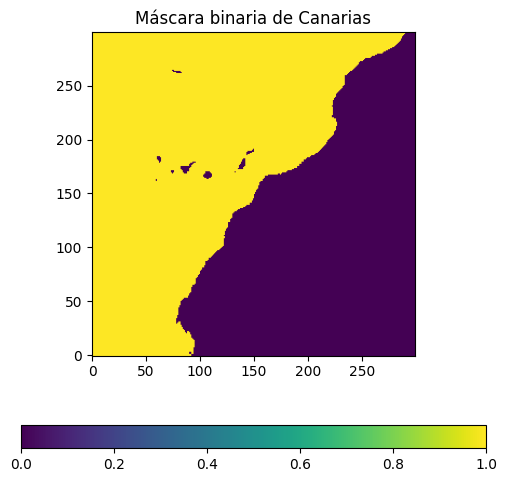

In [28]:
mask_canary = xr.open_dataset(r"data\bathy_mask_can.nc")

mask_canary_values = mask_canary["mask"].values
num_lat, num_lon = mask_canary_values.shape
latitudes_bathy = np.linspace(min_latitude, max_latitude, num_lat)
longitudes_bathy = np.linspace(min_longitude, max_longitude, num_lon)

mdt_canary_interpolated = array_mdt_canary_closest.interp(latitude=latitudes_bathy, longitude=longitudes_bathy)

mdt_canary_interpolated_values = mdt_canary_interpolated.values

mdt_canary_interpolated_values_glo = mdt_canary_interpolated_values


plt.figure(figsize=(6, 6))
plt.imshow(mask_canary_values, cmap='viridis', origin='lower')
plt.colorbar(orientation='horizontal')
plt.title('Máscara binaria de Canarias')
plt.show()

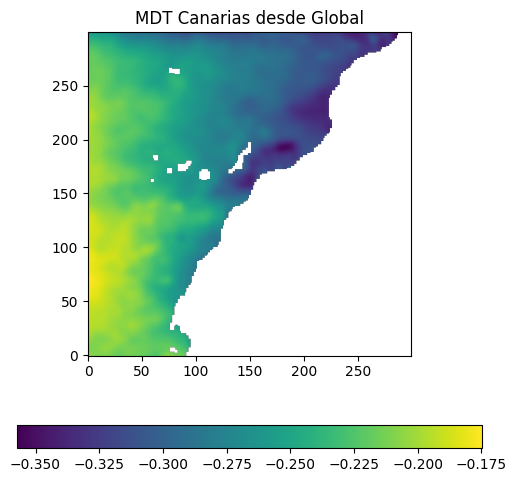

In [29]:
plt.figure(figsize=(6, 6))
plt.imshow(mdt_canary_interpolated_values, cmap='viridis', origin='lower')
plt.colorbar(orientation='horizontal')
plt.title('MDT Canarias desde Global')
plt.show()

### Lo mismo con datos específicos de Europa en lugar de globales

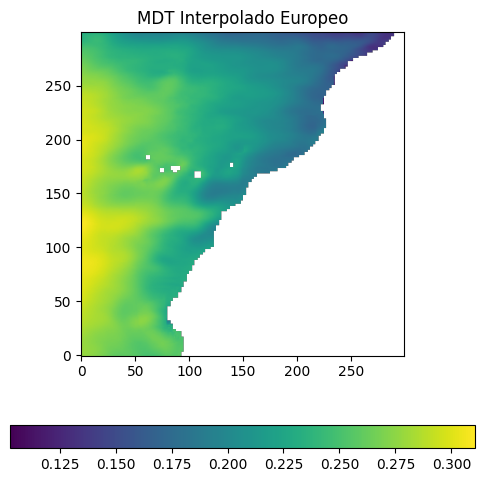

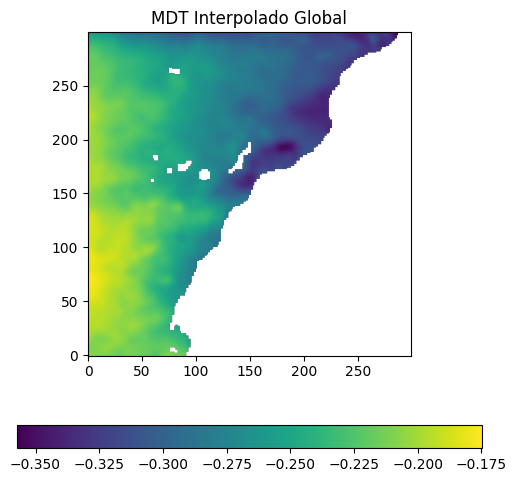

In [30]:
#https://data.marine.copernicus.eu/product/SEALEVEL_EUR_PHY_MDT_L4_STATIC_008_070/files?subdataset=cmems_obs-sl_eur_phy-mdt_my_l4-0.0625deg_P20Y_202411--ext--mdt

mdt_canary = xr.open_dataset(r"data\mdt_cmems_2024_europe.nc")
mask_canary = xr.open_dataset(r"data\bathy_mask_can.nc")

array_mdt_canary = mdt_canary["mdt"]
latitudes = mdt_canary["latitude"].values
longitudes = mdt_canary["longitude"].values

min_latitude = 19.55
max_latitude = 34.525
min_longitude = -20.97
max_longitude = -5.975

central_lat = (min_latitude + max_latitude) / 2
central_lon = (min_longitude + max_longitude) / 2
lat_idx = (np.abs(latitudes - central_lat)).argmin()
lon_idx = (np.abs(longitudes - central_lon)).argmin()

lat_min_idx = max(0, lat_idx - 150)
lat_max_idx = min(len(latitudes), lat_idx + 150)
lon_min_idx = max(0, lon_idx - 150)
lon_max_idx = min(len(longitudes), lon_idx + 150)

array_mdt_canary_closest = array_mdt_canary.isel(
    latitude=slice(lat_min_idx, lat_max_idx),
    longitude=slice(lon_min_idx, lon_max_idx)
)


if array_mdt_canary_closest.size == 0:
    raise ValueError("El recorte de MDT está vacío. Verifica los índices y el rango de datos.")


mask_canary_values = mask_canary["mask"].values
num_lat, num_lon = mask_canary_values.shape
latitudes_bathy = np.linspace(min_latitude, max_latitude, num_lat)
longitudes_bathy = np.linspace(min_longitude, max_longitude, num_lon)


if not (latitudes.min() <= latitudes_bathy.min() <= latitudes.max()) or not (latitudes.min() <= latitudes_bathy.max() <= latitudes.max()):
    raise ValueError("Las latitudes de interpolación están fuera del rango del MDT.")
if not (longitudes.min() <= longitudes_bathy.min() <= longitudes.max()) or not (longitudes.min() <= longitudes_bathy.max() <= longitudes.max()):
    raise ValueError("Las longitudes de interpolación están fuera del rango del MDT.")

mdt_canary_interpolated = array_mdt_canary_closest.interp(latitude=latitudes_bathy, longitude=longitudes_bathy)

mdt_canary_interpolated_values = mdt_canary_interpolated.values
mdt_canary_interpolated_values_eu = mdt_canary_interpolated_values.squeeze()

plt.figure(figsize=(6, 6))
plt.imshow(mdt_canary_interpolated_values_eu, cmap='viridis', origin='lower')
plt.colorbar(orientation='horizontal')
plt.title('MDT Interpolado Europeo')
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(mdt_canary_interpolated_values_glo, cmap='viridis', origin='lower')
plt.colorbar(orientation='horizontal')
plt.title('MDT Interpolado Global')
plt.show()


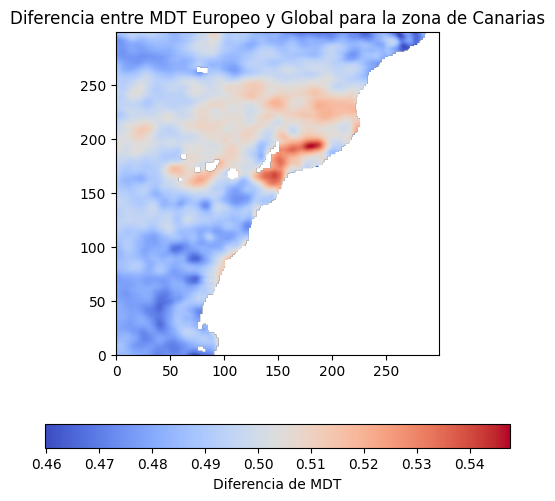

In [31]:
mdt_difference = mdt_canary_interpolated_values_eu - mdt_canary_interpolated_values_glo

plt.figure(figsize=(6, 6))
plt.imshow(mdt_difference, cmap='coolwarm', origin='lower')
plt.colorbar(label="Diferencia de MDT", orientation='horizontal')
plt.title('Diferencia entre MDT Europeo y Global para la zona de Canarias')
plt.show()

### Máscara bordes original

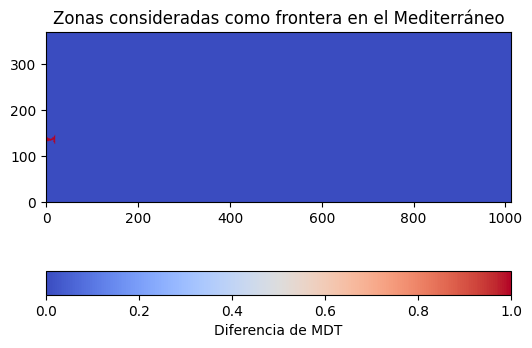

In [32]:
boundary = np.load(r"data\mediterranean\static\boundary_mask.npy")[0]

plt.figure(figsize=(6, 6))
plt.imshow(boundary, cmap='coolwarm', origin='lower')
plt.colorbar(label="Diferencia de MDT", orientation='horizontal')
plt.title('Zonas consideradas como frontera en el Mediterráneo')
plt.show()

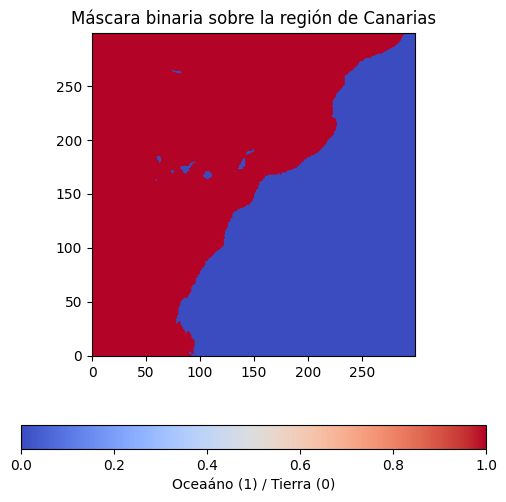

In [33]:
mask = np.load(r"data\sea_mask_can.npy")
mask = mask.squeeze()


plt.figure(figsize=(6, 6))
plt.imshow(mask, cmap="coolwarm", origin="lower")
plt.colorbar(label="Oceaáno (1) / Tierra (0)", orientation="horizontal")
plt.title("Máscara binaria sobre la región de Canarias")
plt.show()

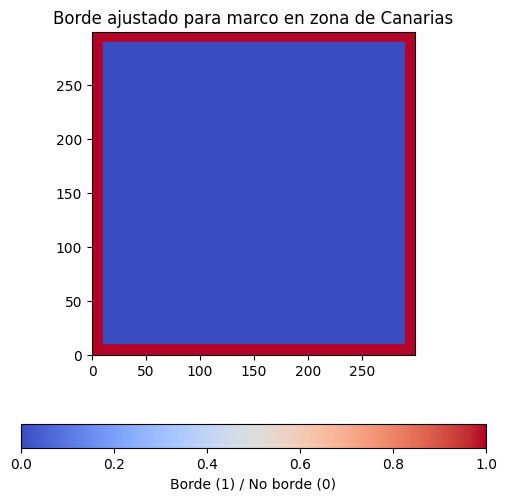

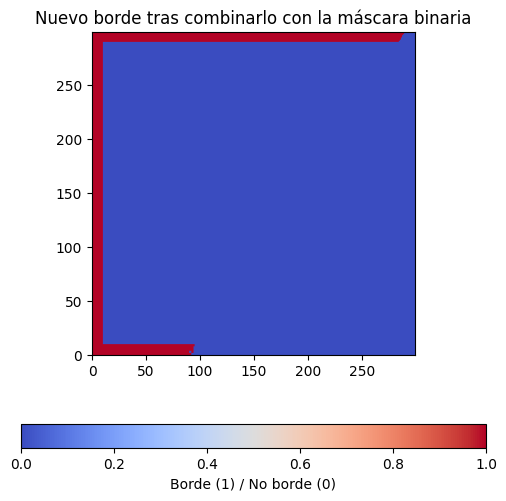

In [34]:
boundary = np.zeros((300, 300), dtype=np.uint8)

border_size = 10

boundary[:border_size, :] = 1
boundary[-border_size:, :] = 1
boundary[:, :border_size] = 1
boundary[:, -border_size:] = 1

plt.figure(figsize=(6, 6))
plt.imshow(boundary, cmap="coolwarm", origin="lower")
plt.colorbar(label="Borde (1) / No borde (0)", orientation="horizontal")
plt.title("Borde ajustado para marco en zona de Canarias")
plt.show()

combined_mask = boundary & mask

plt.figure(figsize=(6, 6))
plt.imshow(combined_mask, cmap="coolwarm", origin="lower")
plt.colorbar(label="Borde (1) / No borde (0)", orientation="horizontal")
plt.title("Nuevo borde tras combinarlo con la máscara binaria")
plt.show()

### Extracción de clúster para extraer forma del continente africano

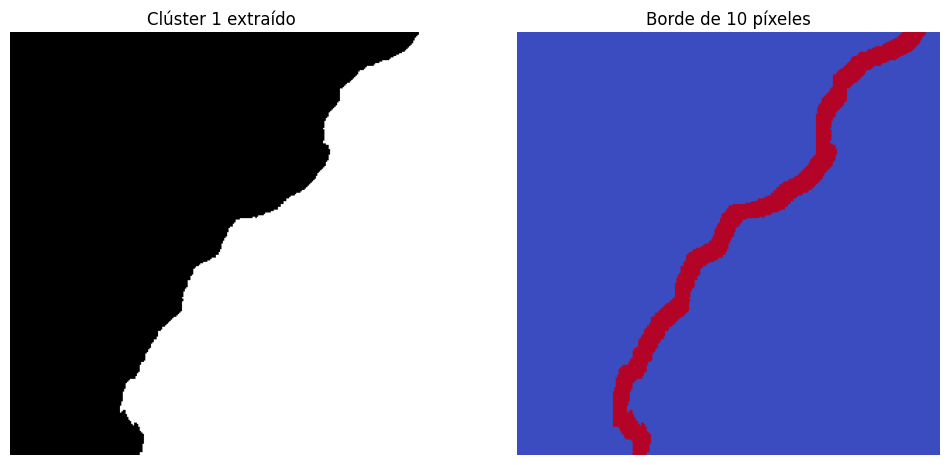

In [35]:
inverted_mask = np.logical_not(mask).astype(np.uint8)

structure = np.array([[0, 1, 0], 
                      [1, 1, 1], 
                      [0, 1, 0]])

labeled_mask, num_clusters = scipy.ndimage.label(inverted_mask, structure)

cluster_1_mask = (labeled_mask == 1).astype(np.uint8)

structure_border = np.ones((3, 3))
dilated_cluster_1_mask = scipy.ndimage.binary_dilation(cluster_1_mask, structure=structure_border, iterations=10)

border_mask = dilated_cluster_1_mask.astype(np.uint8) - cluster_1_mask.astype(np.uint8)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(cluster_1_mask, cmap="gray", origin="lower")
ax[0].set_title("Clúster 1 extraído")
ax[0].axis("off")

ax[1].imshow(border_mask, cmap="coolwarm", origin="lower")
ax[1].set_title("Borde de 10 píxeles")
ax[1].axis("off")

plt.show()

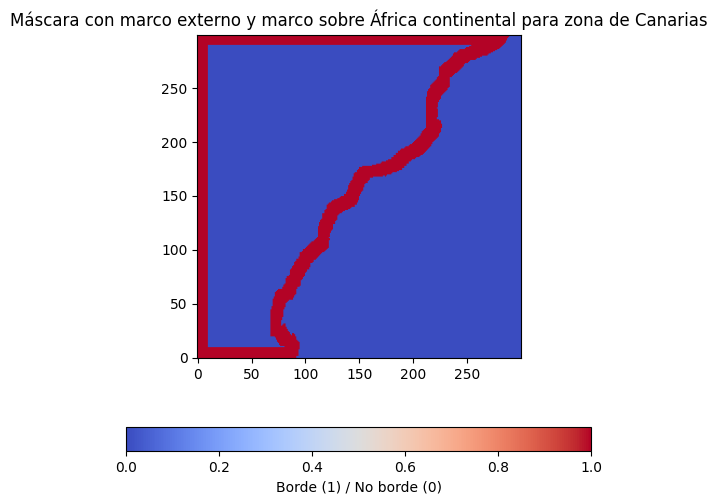

In [36]:
final_mask = np.maximum(combined_mask, border_mask)

plt.figure(figsize=(6, 6))
plt.imshow(final_mask, cmap="coolwarm", origin="lower")
plt.colorbar(label="Borde (1) / No borde (0)", orientation="horizontal")
plt.title("Máscara con marco externo y marco sobre África continental para zona de Canarias")
plt.show()